<a href="https://colab.research.google.com/github/chien2734/sgu_data_analyst/blob/chien/Lab2_DataAnalytics/DataAnalystExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Data Analysis Example**

## 4. USDA Food Database

### Thông tin về dữ liệu
* USDA Food Database là cơ sở dữ liệu về thông tin dinh dưỡng của thực phẩm do Bộ Nông nghiệp Hoa Kỳ (USDA) cung cấp.
* Cơ sở dữ liệu này chứa thông tin chi tiết về các loại thực phẩm, bao gồm:
  * lượng calo
  * protein
  * chất béo
  * carbohydrate
  * vitamin
  * khoáng chất và các thành phần dinh dưỡng khác.

### Nạp dữ liệu
Lập trình viên Ashley Williams đã tạo một phiên bản của cơ sở dữ liệu này ở định dạng JSON, giúp cho việc truy xuất và xử lý dữ liệu bằng các ngôn ngữ lập trình (như Python, JavaScript, v.v.) trở nên dễ dàng hơn.

In [5]:
import json
db = json.load(open('datasets/usda_food/database.json'))
len(db)

6636

Bộ dữ liệu gồm 6636 tập dữ liệu

In [6]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [9]:
db[0]["nutrients"][0]

{'value': 29.2,
 'units': 'g',
 'description': 'Total lipid (fat)',
 'group': 'Composition'}

In [11]:
import pandas as pd
nutrients = pd.DataFrame(db[0]["nutrients"])
nutrients.head(10)

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy
7,0.00,g,"Fiber, total dietary",Composition
8,673.00,mg,"Calcium, Ca",Elements
9,0.64,mg,"Iron, Fe",Elements


In [14]:
info_keys = ["description", "group", "id", "manufacturer"]
info = pd.DataFrame(db, columns=info_keys)
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [15]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


Kết quả cho thấy có sự **missing value** ở cột **manufacturer**


In [18]:
pd.value_counts(info["group"])[:10]

/tmp/ipython-input-3634668934.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(info["group"])[:10]


,count
group,
Vegetables and Vegetable Products,812
Beef Products,618
Baked Products,496
Breakfast Cereals,403
Legumes and Legume Products,365
Fast Foods,365
"Lamb, Veal, and Game Products",345
Sweets,341
Fruits and Fruit Juices,328


In [19]:
nutrients = []
for rec in db:
  fnuts = pd.DataFrame(rec["nutrients"])
  fnuts["id"] = rec["id"]
  nutrients.append(fnuts)
nutrients = pd.concat(nutrients, ignore_index=True)

nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [20]:
nutrients.duplicated().sum()

np.int64(14179)

In [21]:
nutrients = nutrients.drop_duplicates()
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [22]:
col_mapping = {"description" : "food", "group" : "fgroup"}
info = info.rename(columns=col_mapping, copy=False)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [23]:
col_mapping = {"description" : "nutrient", "group" : "nutgroup"}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [24]:
ndata = pd.merge(nutrients, info, on="id")
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 22.9+ MB


In [25]:
ndata.iloc[30000]

,30000
value,0.04
units,g
nutrient,Glycine
nutgroup,Amino Acids
id,6158
food,"Soup, tomato bisque, canned, condensed"
fgroup,"Soups, Sauces, and Gravies"
manufacturer,


<Axes: ylabel='fgroup'>

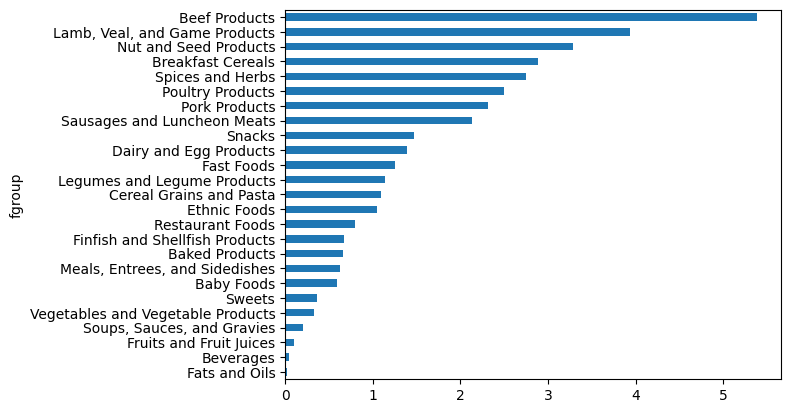

In [26]:
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5)
result["Zinc, Zn"].sort_values().plot(kind="barh")

In [27]:
by_nutrient = ndata.groupby(["nutgroup", "nutrient"])

def get_maximum(x):
  return x.loc[x.value.idxmax()]
max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]

# make the food a little smaller
max_foods["food"] = max_foods["food"].str[:50]

/tmp/ipython-input-1974872589.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]


In [28]:
max_foods.loc["Amino Acids"]["food"]

,food
nutrient,
Alanine,"Gelatins, dry powder, unsweetened"
Arginine,"Seeds, sesame flour, low-fat"
Aspartic acid,Soy protein isolate
Cystine,"Seeds, cottonseed flour, low fat (glandless)"
Glutamic acid,Soy protein isolate
Glycine,"Gelatins, dry powder, unsweetened"
Histidine,"Whale, beluga, meat, dried (Alaska Native)"
Hydroxyproline,"KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA..."
Isoleucine,"Soy protein isolate, PROTEIN TECHNOLOGIES INTE..."


## 5. 2012 Federal Election Commission Database

In [29]:
fec = pd.read_csv("datasets/fec/P00000001-ALL.csv", low_memory=False)
fec.info()

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/fec/P00000001-ALL.csv'